## import all packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
import os
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
import statistics as stat

## load data into variables

In [2]:
with open('X_train.pkl', 'rb') as f:
    X_train_data = pickle.load(f)
    X_train_data = X_train_data.transpose() 

with open('Y_train.pkl', 'rb') as f:
    Y_train_data = pickle.load(f)
    Y_train_data = Y_train_data.transpose() 

with open('X_test.pkl', 'rb') as f:
    X_test_data = pickle.load(f)

with open('Fx_test.pkl', 'rb') as f:
    Y_test_data = pickle.load(f)

important_values = []

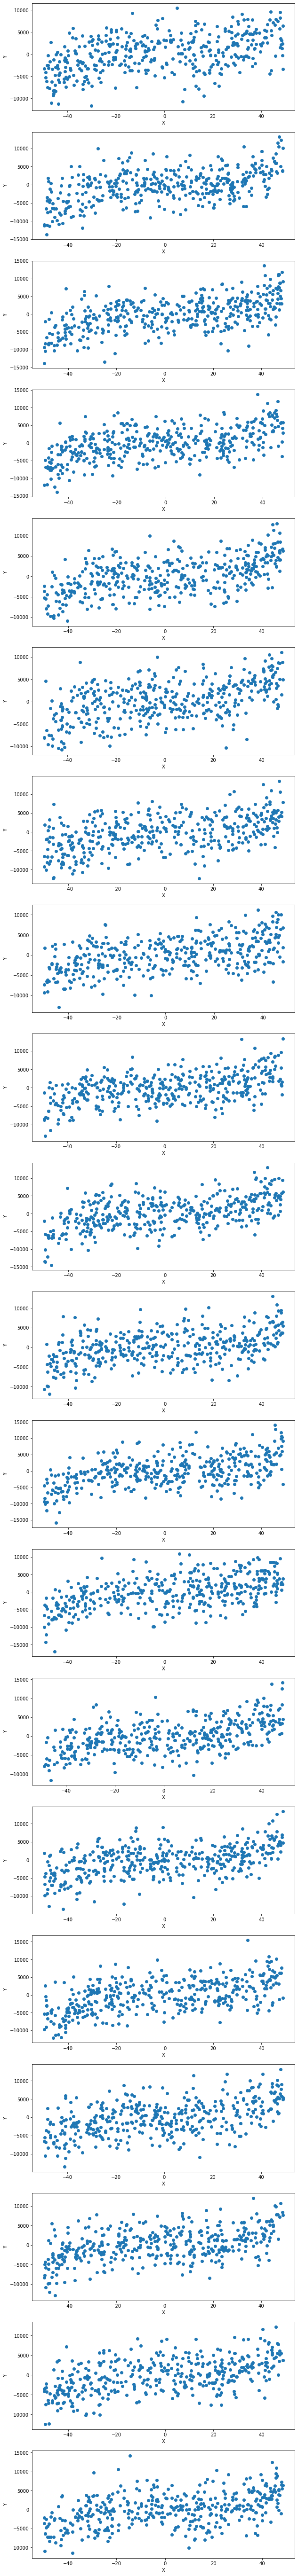

In [3]:
fig, ax = plt.subplots(20,1 , figsize=(10, 100))

for i in range(X_train_data.shape[1]):
    ax[i].scatter(x = X_train_data[:,i], y = Y_train_data[:,i])
    ax[i].set_xlabel("X")
    ax[i].set_ylabel("Y")

In [4]:
def train_model(deg, x_train_data,y_train_data, x_test, y_test):
    regressor = LinearRegression()
    poly = PolynomialFeatures(degree= deg)
    predicted_values = []
    avg_expected_loss_list = []
    avg_bias_list = []
    avg_var_list = []
    poly_test = poly.fit_transform(x_test.reshape(-1,1))
    for i in range(x_train_data.shape[1]):
        poly_train = poly.fit_transform(x_train_data[:,i].reshape(-1,1))
        regressor.fit(poly_train,y_train_data[:,i].reshape(-1,1))
        predicted_values.append(regressor.predict(poly_test))
        avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(regressor, poly_train,y_train_data[:,i], poly_test,y_test,loss='mse')
        avg_expected_loss_list.append(avg_expected_loss)
        avg_bias_list.append(avg_bias)
        avg_var_list.append(avg_var)

    
    print(f"average expected loss = { stat.mean(avg_expected_loss_list)}")
    print(f"average bias = {stat.mean(avg_bias_list)}")
    print(f"average variance = {stat.mean(avg_var_list)}")

    fig, ax = plt.subplots(20, 1 , figsize=(8, 40))
    for i in range(x_train_data.shape[1]):
        ax[i].scatter(x = x_test, y = predicted_values[i])
        ax[i].scatter(x = x_test, y = y_test)
        ax[i].set_xlabel("X")
        ax[i].set_ylabel("Y")
    return np.array([stat.mean(avg_expected_loss_list),stat.mean(avg_bias_list),stat.mean(avg_var_list)])    

average expected loss = 1144382.5960739958
average bias = 1073241.989087619
average variance = 71140.60698637688


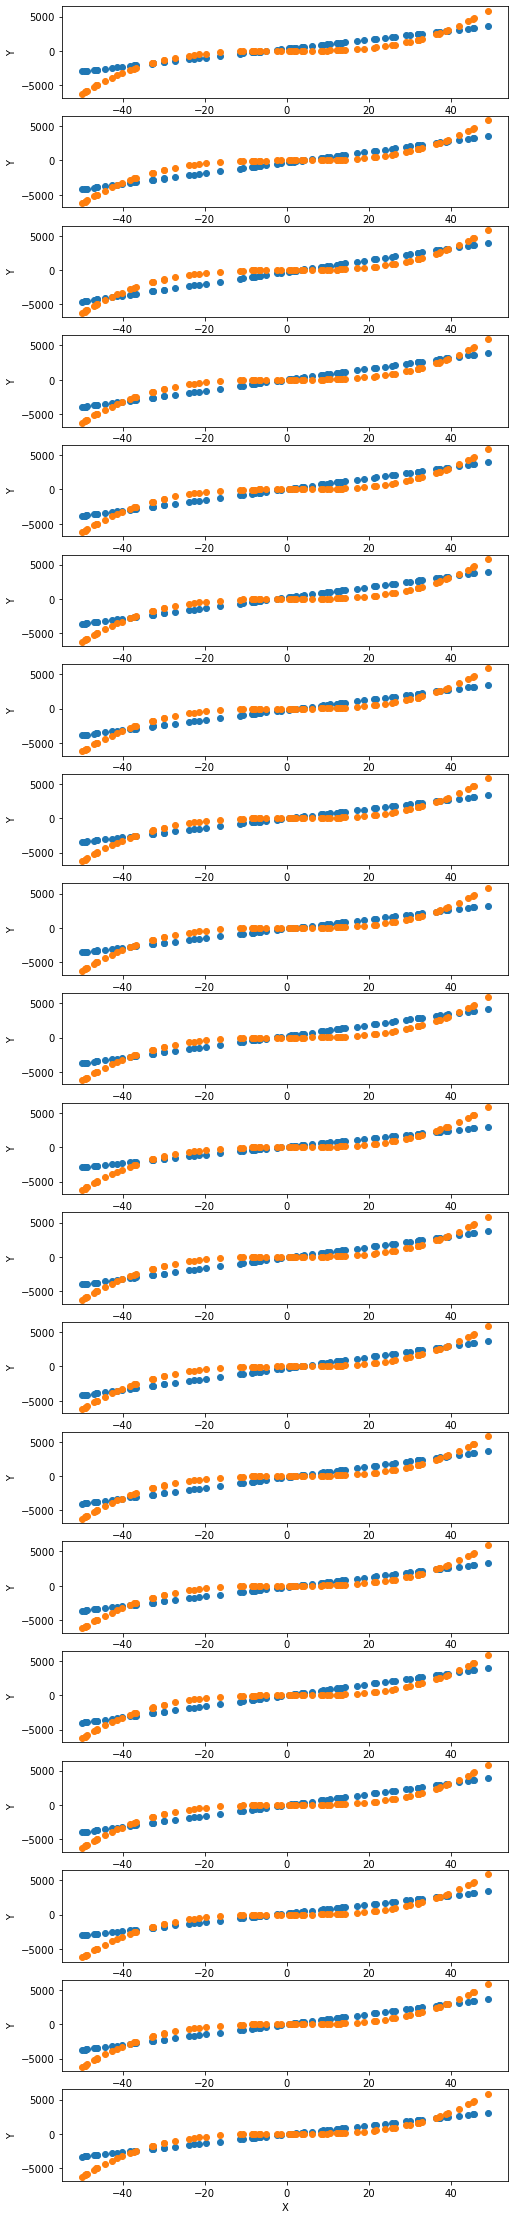

In [5]:
important_values.append(train_model(1,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 1203709.8901378373
average bias = 1083247.3421319001
average variance = 120462.54800593709


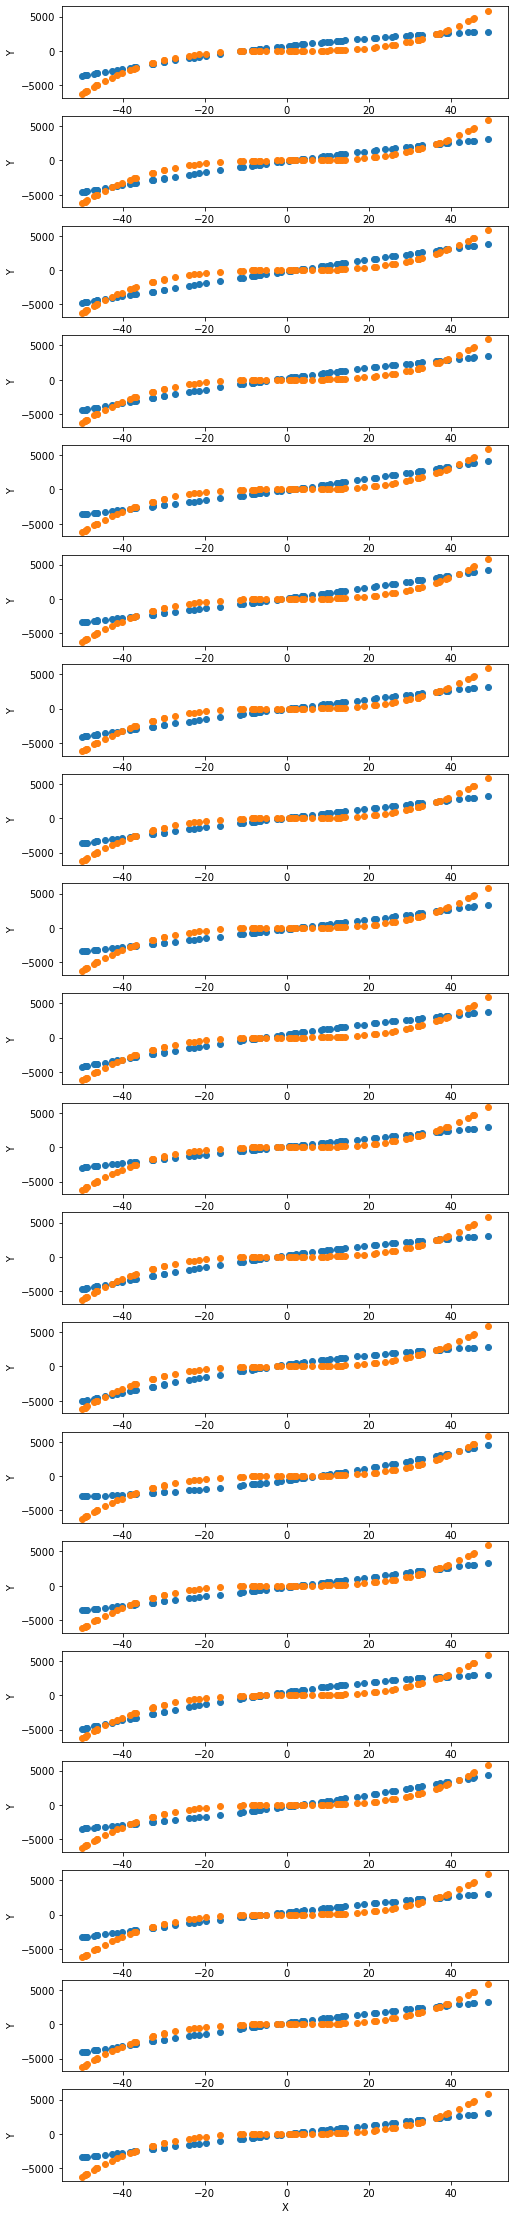

In [6]:
important_values.append(train_model(2,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 310676.21376801445
average bias = 161131.23986950057
average variance = 149544.9738985139


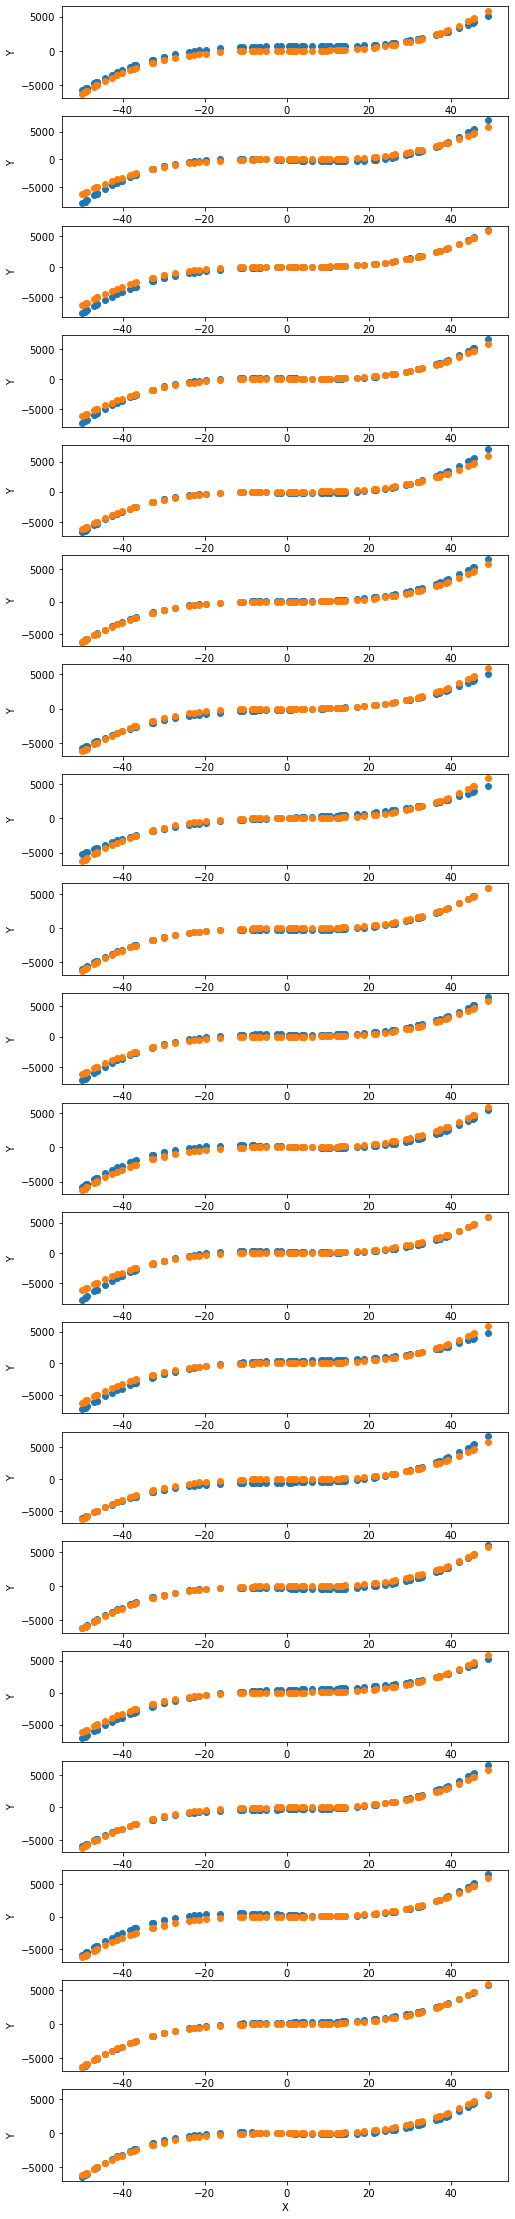

In [7]:
important_values.append(train_model(3,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 423951.4852767873
average bias = 224393.67287054556
average variance = 199557.81240624178


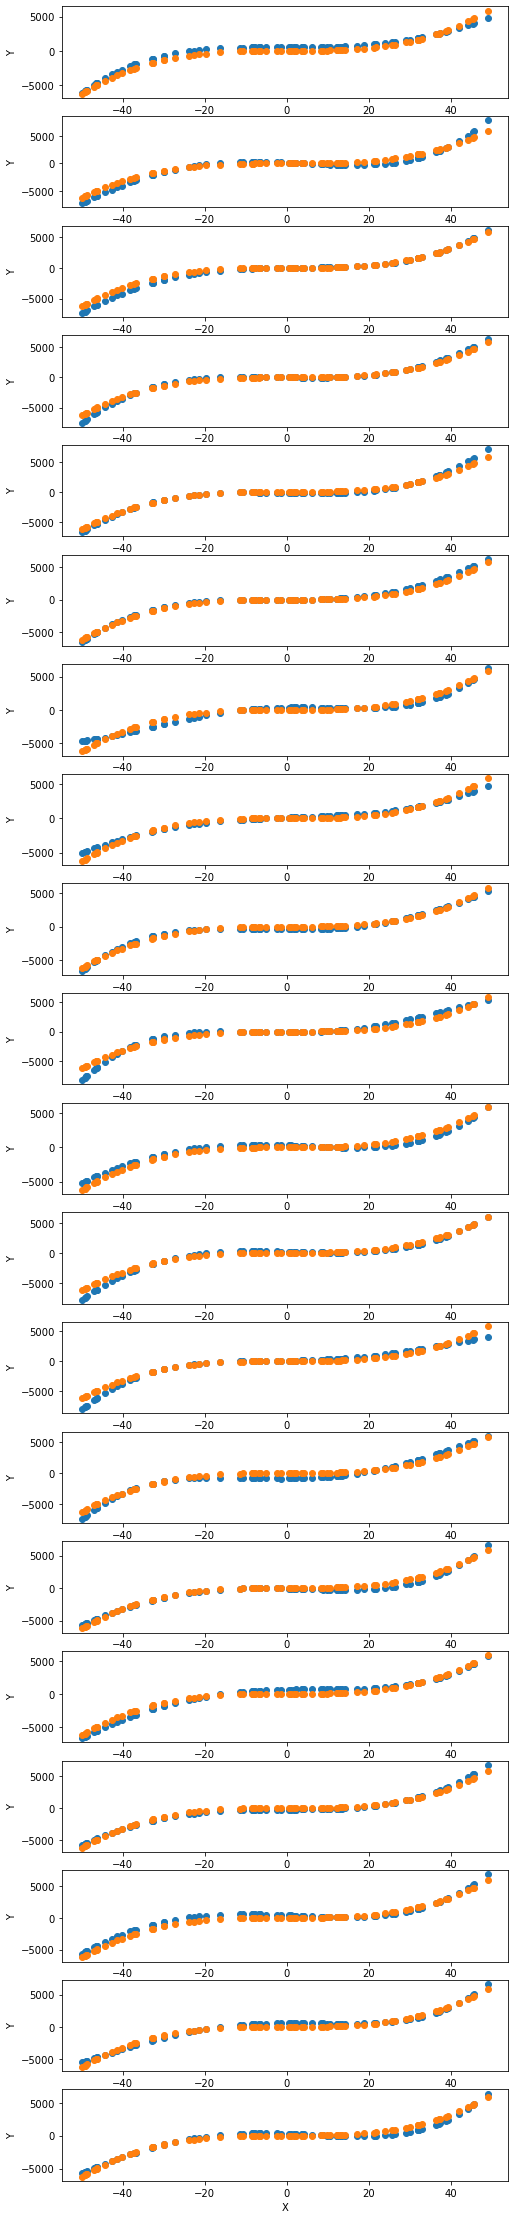

In [8]:
important_values.append(train_model(4,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 521144.1329845149
average bias = 285005.18536366423
average variance = 236138.9476208507


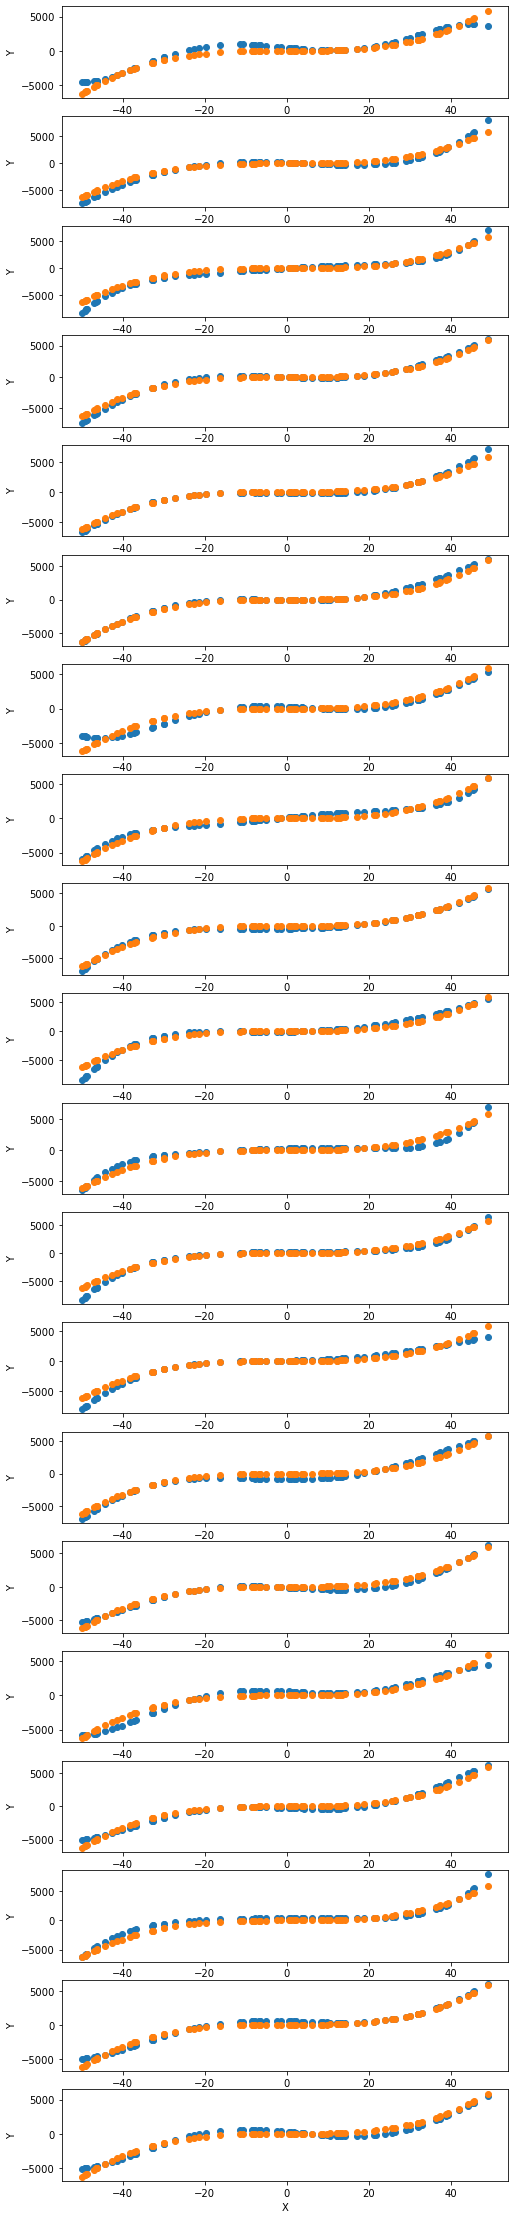

In [9]:
important_values.append(train_model(5,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 617725.4755304178
average bias = 332006.2248253046
average variance = 285719.25070511317


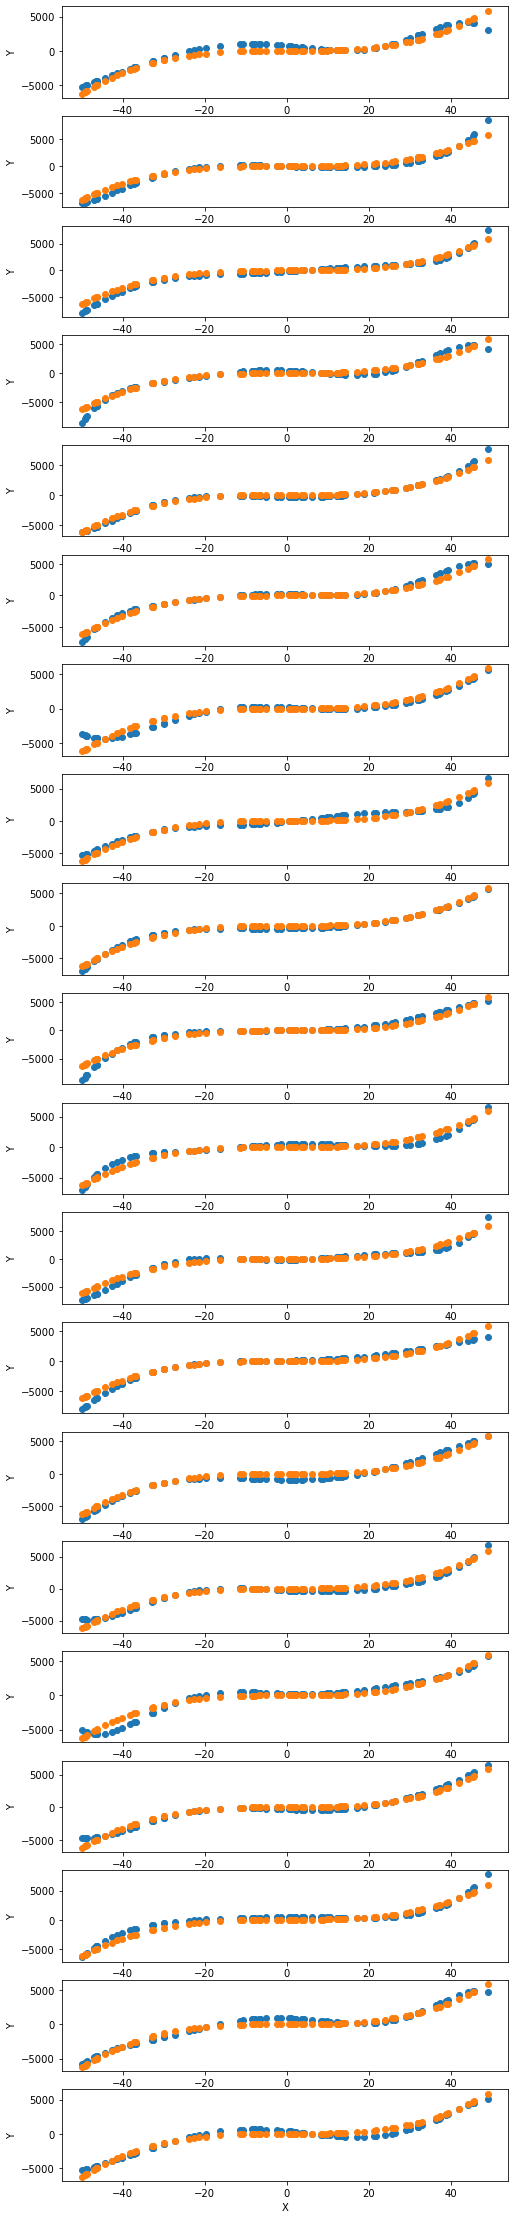

In [10]:
important_values.append(train_model(6,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 704828.2118031674
average bias = 368054.83141903626
average variance = 336773.38038413116


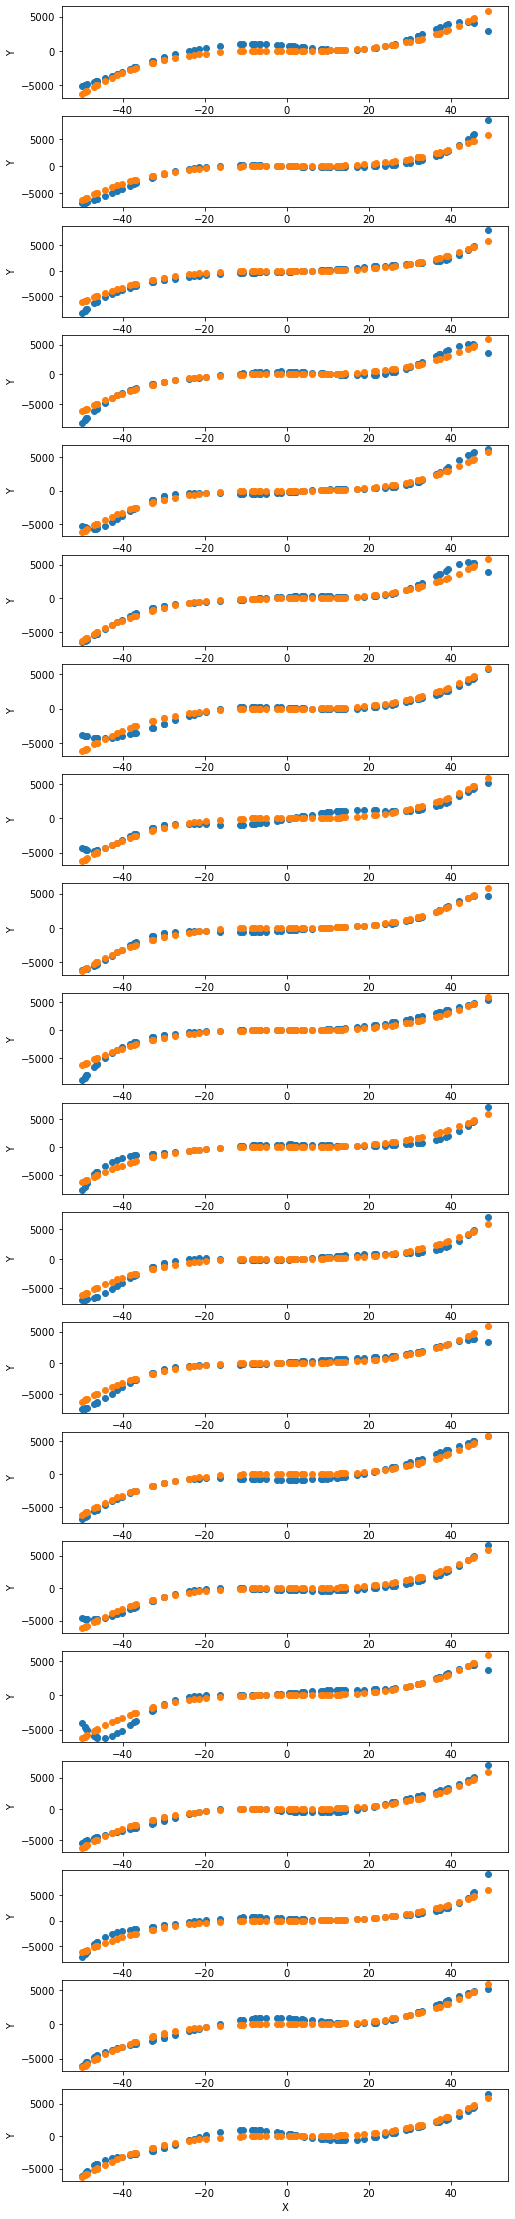

In [11]:
important_values.append(train_model(7,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 810954.728132129
average bias = 425650.954203915
average variance = 385303.77392821375


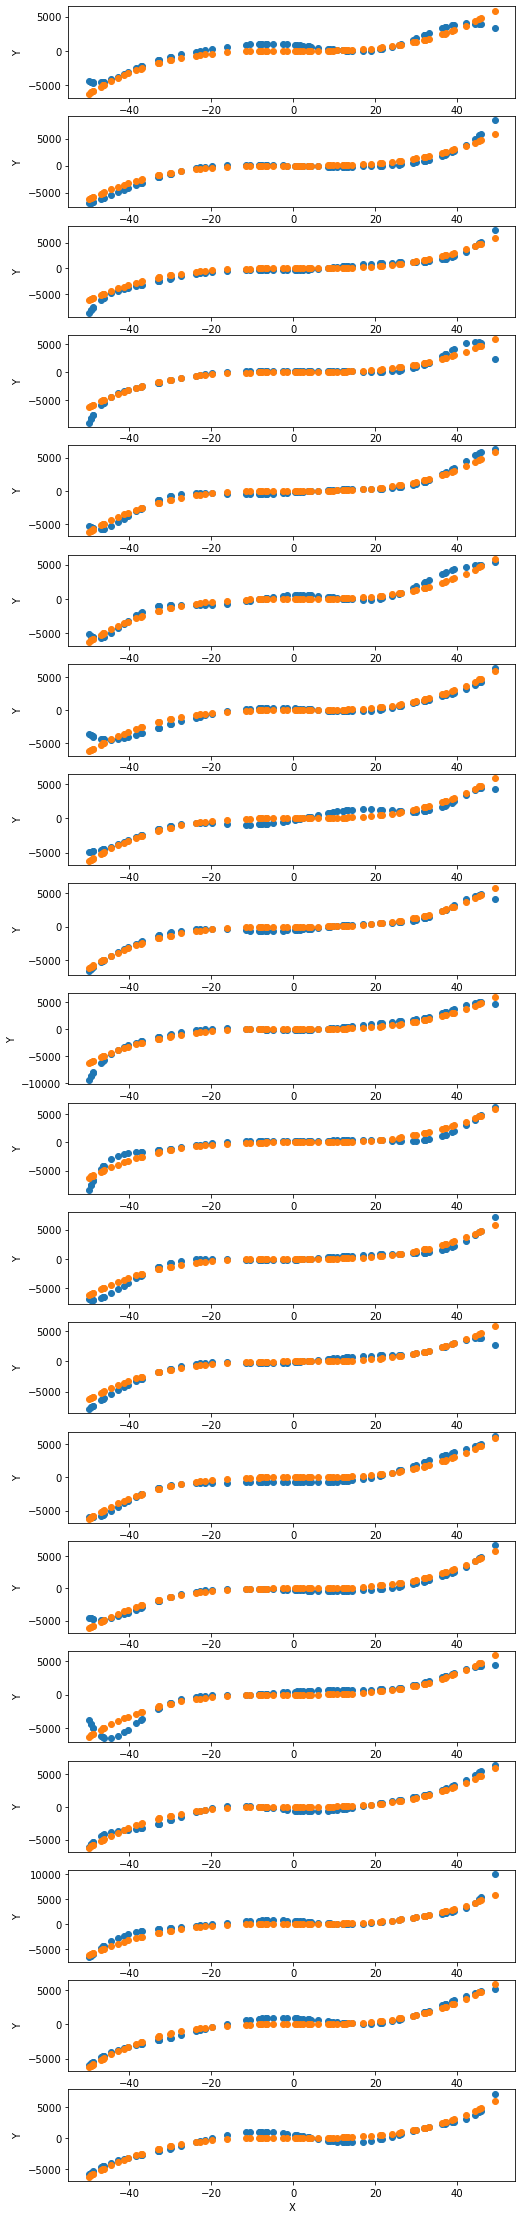

In [12]:
important_values.append(train_model(8,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 920292.4809293522
average bias = 481983.9098461694
average variance = 438308.5710831828


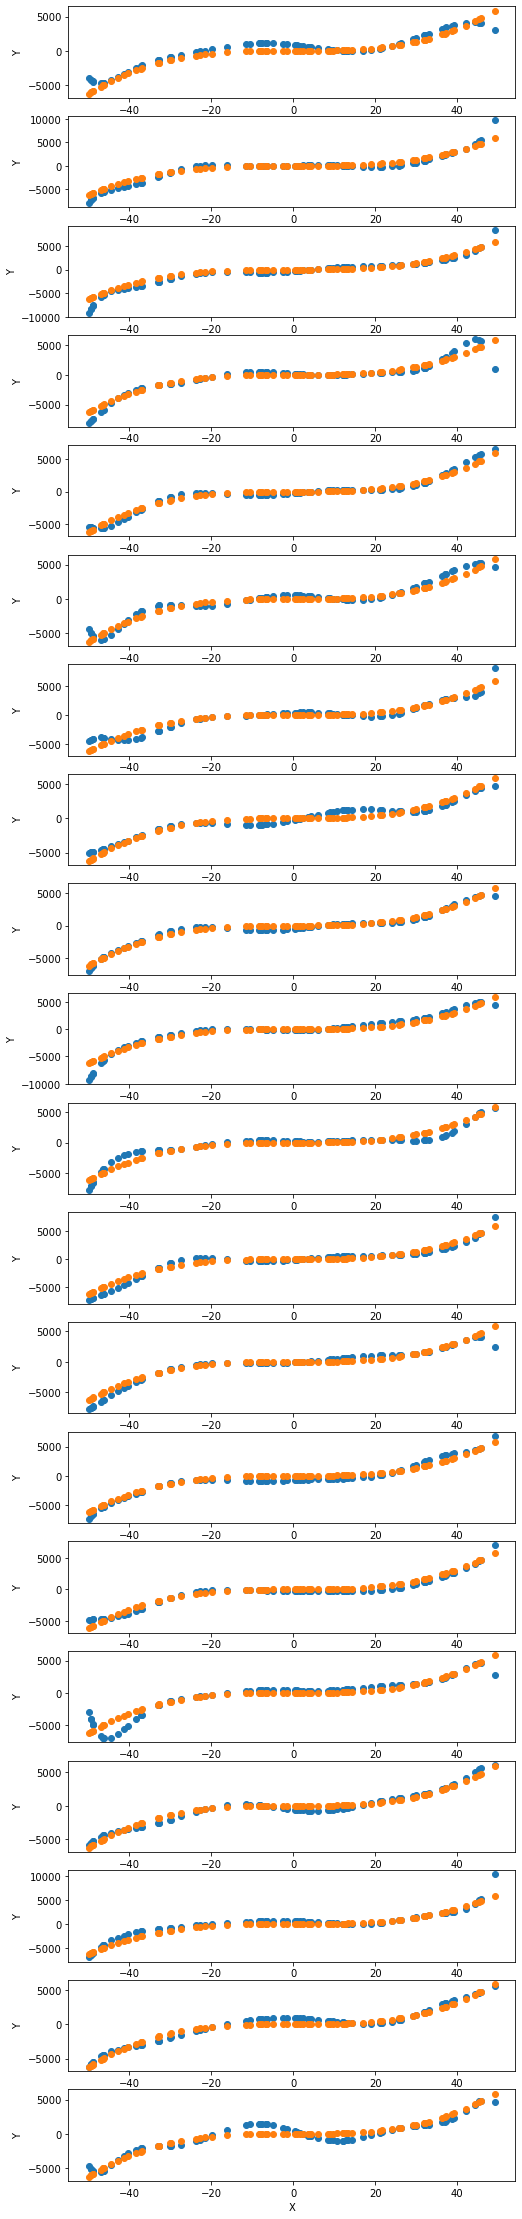

In [13]:
important_values.append(train_model(9,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 974564.0894478892
average bias = 481434.30549825827
average variance = 493129.783949631


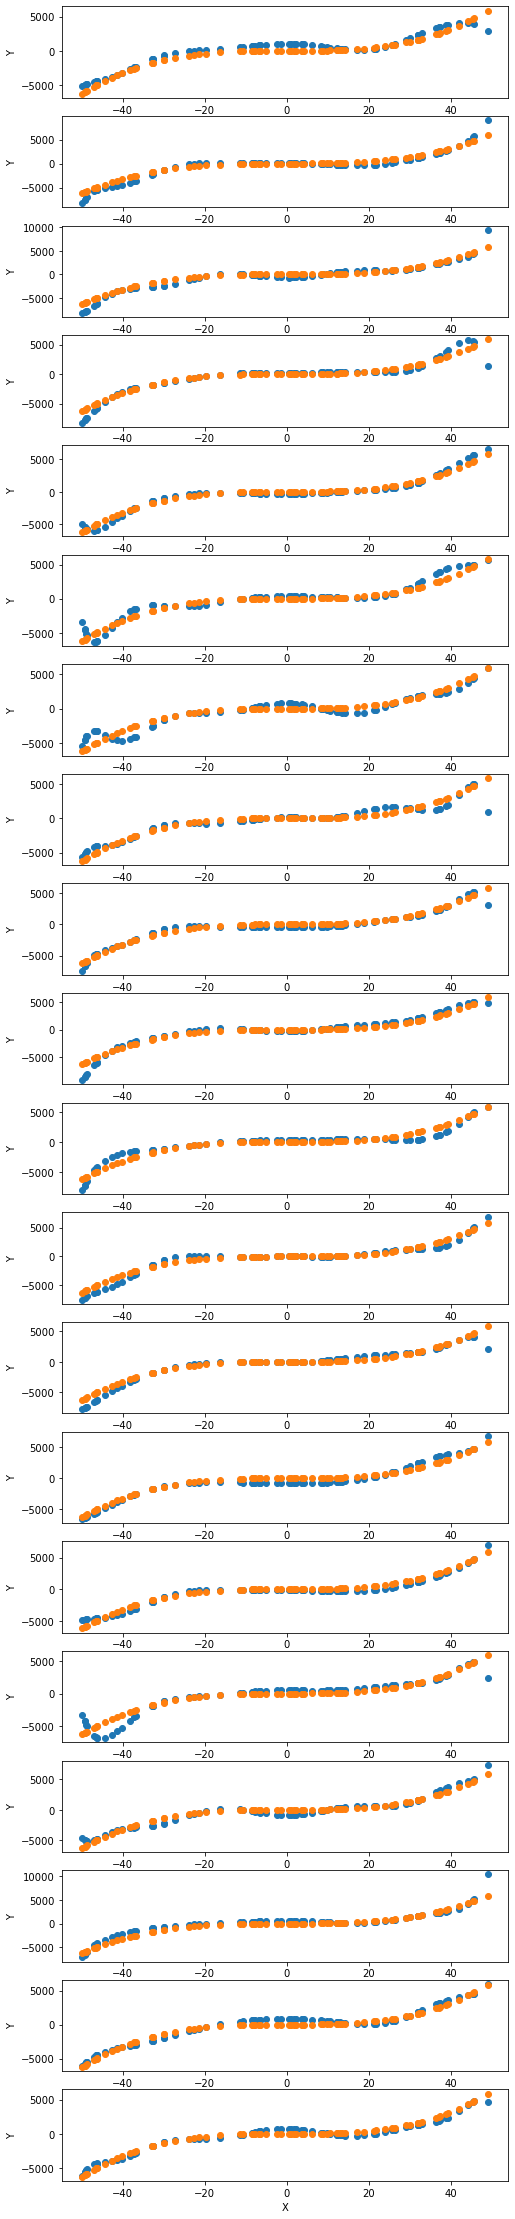

In [14]:
important_values.append(train_model(10,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 1047628.0269856211
average bias = 526198.4882629724
average variance = 521429.5387226487


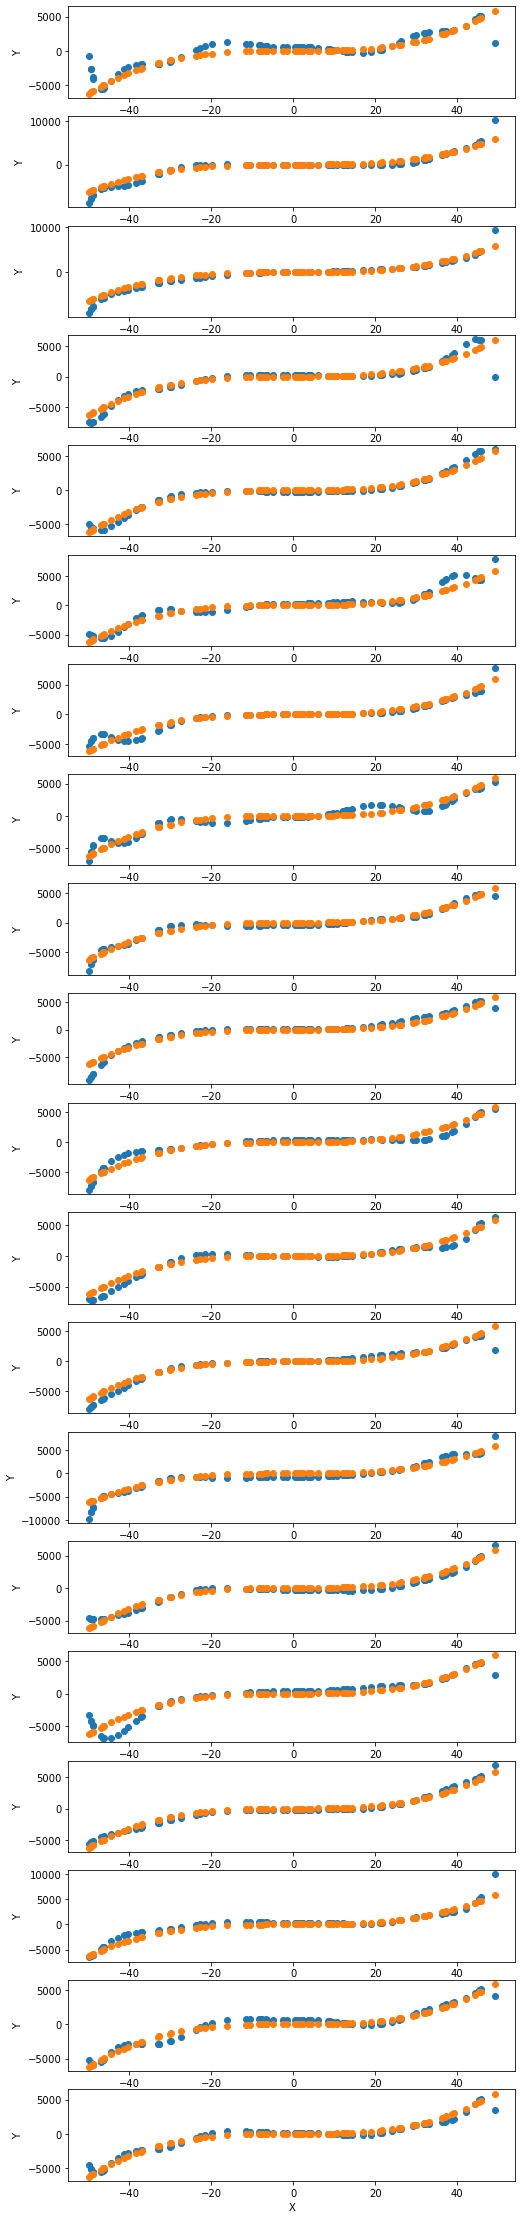

In [15]:
important_values.append(train_model(11,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 1103136.096166075
average bias = 528048.0416581855
average variance = 575088.0545078894


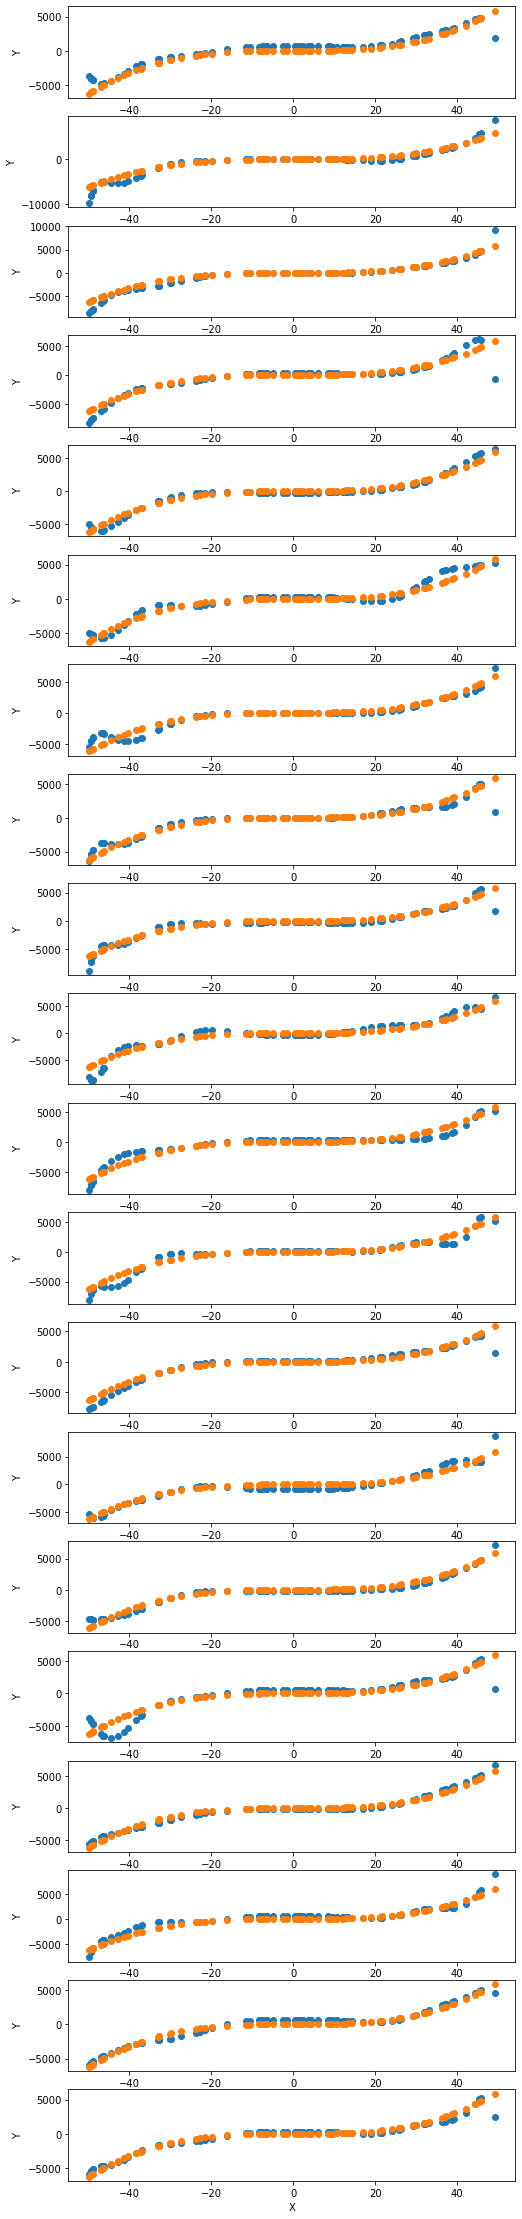

In [16]:
important_values.append(train_model(12,X_train_data,Y_train_data,X_test_data,Y_test_data))

average expected loss = 1165089.3608428014
average bias = 564647.6043413384
average variance = 600441.756501463


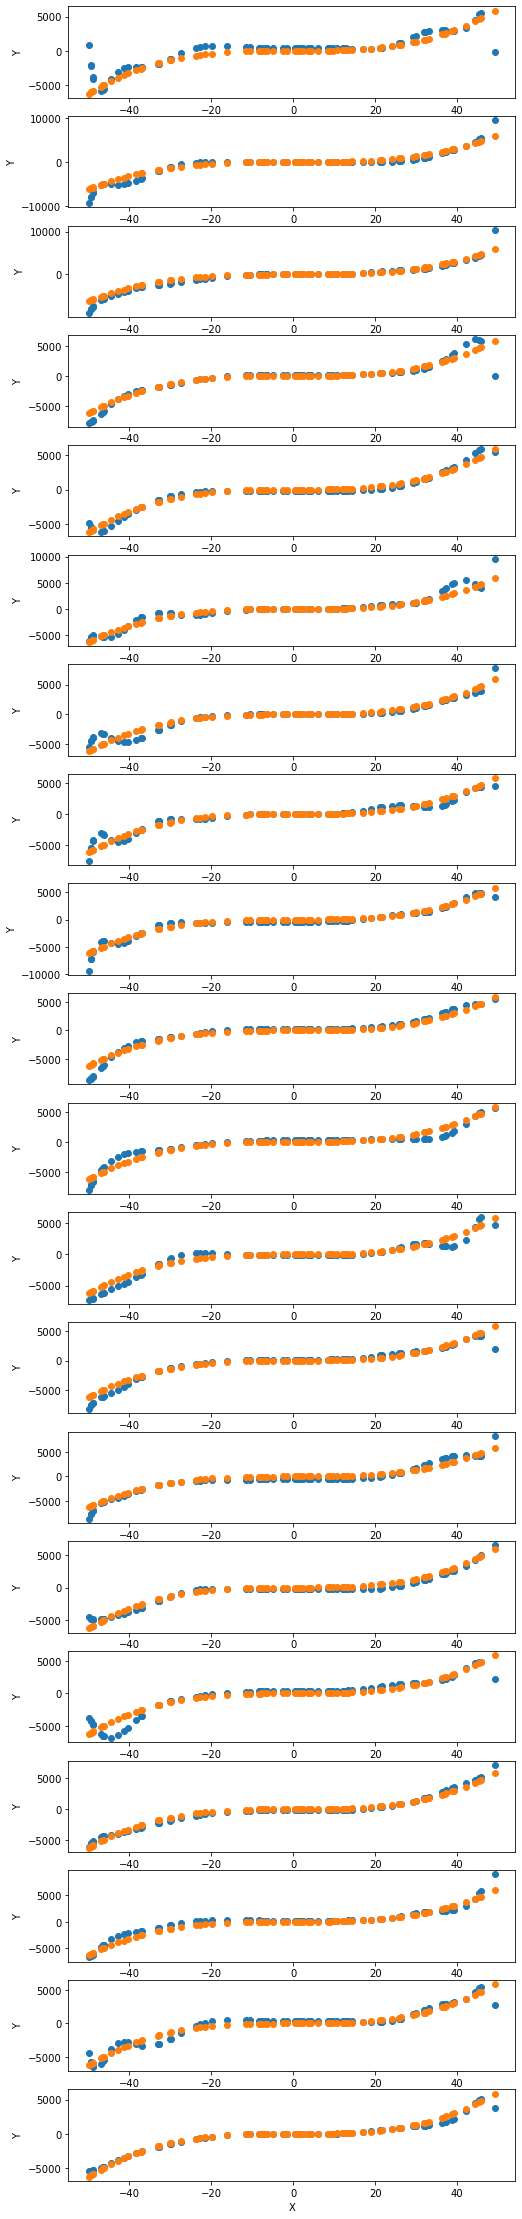

In [17]:
important_values.append(train_model(13,X_train_data,Y_train_data,X_test_data,Y_test_data))

## plotting MSE, bias and variance

[[1144382.596074   1073241.98908762   71140.60698638]
 [1203709.89013784 1083247.3421319   120462.54800594]
 [ 310676.21376801  161131.2398695   149544.97389851]
 [ 423951.48527679  224393.67287055  199557.81240624]
 [ 521144.13298451  285005.18536366  236138.94762085]
 [ 617725.47553042  332006.2248253   285719.25070511]
 [ 704828.21180317  368054.83141904  336773.38038413]
 [ 810954.72813213  425650.95420392  385303.77392821]
 [ 920292.48092935  481983.90984617  438308.57108318]
 [ 974564.08944789  481434.30549826  493129.78394963]
 [1047628.02698562  526198.48826297  521429.53872265]
 [1103136.09616607  528048.04165819  575088.05450789]
 [1165089.3608428   564647.60434134  600441.75650146]]


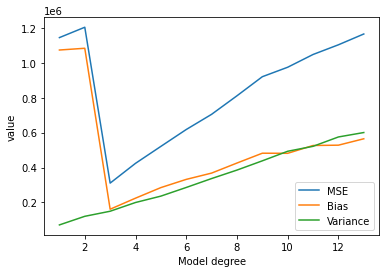

In [18]:
important_values = np.array(important_values)
print(important_values)
plt.plot(np.arange(1,14),important_values[:,0],label="MSE")
plt.plot(np.arange(1,14),important_values[:,1],label="Bias")
plt.plot(np.arange(1,14),important_values[:,2],label="Variance")
plt.xlabel("Model degree")
plt.ylabel("value")
plt.legend()
